# Load the speeds ups
Dictionary structure to store the speed
```json
driver_to_trip_to_speedups = {
    "driver1":  {
        "trip1": [
            speedup0 (pd.DataFrame),
            speedup1 (pd.DataFrame),
            ...
        ]

    }
}
```

In [5]:
import subprocess
import os, sys, pathlib

def root_path():
    result = subprocess.run(['git', 'rev-parse', '--show-toplevel'], stdout=subprocess.PIPE)
    path = result.stdout.decode("utf-8") 
    path = path.replace("\n", "")
    path = path.replace('/', '\\')
    return path

In [6]:
from collections import defaultdict
import os, sys
import pandas as pd

def from_tripname_get_driver(database_speedup_parameters_analysis, trip_name):
    """Return the driver id of the trip"""
    row = database_speedup_parameters_analysis.loc[
        database_speedup_parameters_analysis["trip_name"] == trip_name
    ]
    if row.empty:
        return None
    return row["driver_id"].iloc[0]

def load_speedup() -> dict:
    windows_data_folder_path = os.path.join(root_path(), "_temp", "preprocessing", "extraction", "window_data")
    database_path = str(os.path.join(root_path(), "_temp", "speedup_parameters_and_properties.csv"))
    database_speedup_parameters_analysis: pd.DataFrame = pd.read_csv(database_path)
    driver_to_trips = defaultdict(dict)
    for i, trip_directory in enumerate(os.listdir(windows_data_folder_path)):
        speedup_list = []
        for window_file_name in os.listdir(os.path.join(windows_data_folder_path, trip_directory)):
            if "speed_up" in window_file_name:
                data_path = str(os.path.join(windows_data_folder_path, trip_directory, window_file_name))
                speed_up_df = pd.read_csv(data_path)
                speedup_list.append(speed_up_df)
        driver = from_tripname_get_driver(database_speedup_parameters_analysis, trip_directory)
        driver_to_trips[driver][trip_directory] = speedup_list
    return driver_to_trips
                
driver_to_trip_to_speedups = load_speedup()

ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

# Overview of the AVT Cadillac CT6 data

## Number of drivers

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Save image folder
image_folder_path = f"{root_path()}/../img_generated_by_jupyter/"
def img_path(filename: str) -> str:
    return f"{image_folder_path}{filename}.png"

# Number of drivers
n_driver = len(driver_to_trip_to_speedups)
print(f"Number of drivers: {n_driver}")

Number of drivers: 33


## Number of trips per driver

In [ ]:
# Number of trips per drivers
rows = []
for driver, trips in driver_to_trip_to_speedups.items():
    for trip in trips:
        rows.append(
            {
                "driver": driver,
                "trip": trip
            }
        )
n_trips = len(rows)
driver_to_n_trips_df = pd.DataFrame(rows)

In [ ]:
# Sort by count of trips
sorted_driver_to_n_trips_df = driver_to_n_trips_df.groupby(["driver"])["trip"].count().reset_index(
    name="n_trips").sort_values(["n_trips"], ascending=False)

Number of trips: 3401


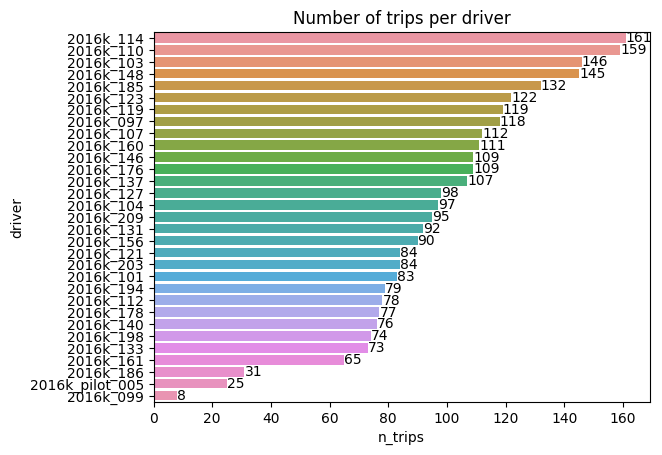

In [ ]:
print(f"Number of trips: {n_trips}")
# Display
fig = plt.figure()
ax = sns.barplot(sorted_driver_to_n_trips_df, y="driver", x="n_trips")
## display values next to the bar
for i in ax.containers:
    ax.bar_label(i,)
title = "Number of trips per driver"
plt.title(title) 
plt.show()
# Save diagram
title.replace(" ", "_").lower()
fig.savefig(img_path(title))

## Lengths of trip per driver

In [ ]:
# Load hours file
trip_stat_per_subject_csv_path = str(os.path.join(root_path(), "_temp", "trip_stat_per_subject.csv"))
trip_stat_per_subject_csv_df: pd.DataFrame = pd.read_csv(trip_stat_per_subject_csv_path)

In [ ]:
# Sort
sorted_driver_to_durations_df =  trip_stat_per_subject_csv_df[trip_stat_per_subject_csv_df["vehicle_type"] == "CT6"].sort_values(["t_hours_driven"], ascending=False)

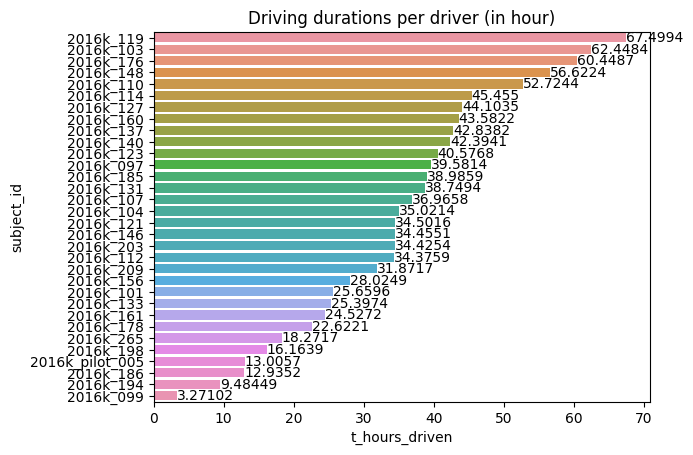

In [ ]:
# Display
fig = plt.figure()
ax = sns.barplot(sorted_driver_to_durations_df, y="subject_id", x="t_hours_driven")
## display values next to the bar
for i in ax.containers:
    ax.bar_label(i,)
title = "Driving durations per driver (in hour)"
plt.title(title) 
plt.show()
# Save diagram
title.replace(" ", "_").lower()
fig.savefig(img_path(title))

## Duration + Number of trips per driver

In [ ]:
sorted_driver_to_n_trips_df.columns = ["subject_id", "n_trips"]
sorted_driver_to_durations_df_only_driven_hours = sorted_driver_to_durations_df.drop(columns=['vehicle_type', 'km_driven', 't_trip_h', 't_trip_standstill_h'])
sorted_driver_to_n_trips_and_driven_hours_df = sorted_driver_to_durations_df_only_driven_hours.merge(sorted_driver_to_n_trips_df, on="subject_id", how="inner")

sorted_driver_to_n_trips_and_driven_hours_df.sort_values(["t_hours_driven"], ascending=False)
unpivot_sorted_driver_to_n_trips_and_driven_hours_df = sorted_driver_to_n_trips_and_driven_hours_df.melt(id_vars='subject_id').rename(columns=str.title)

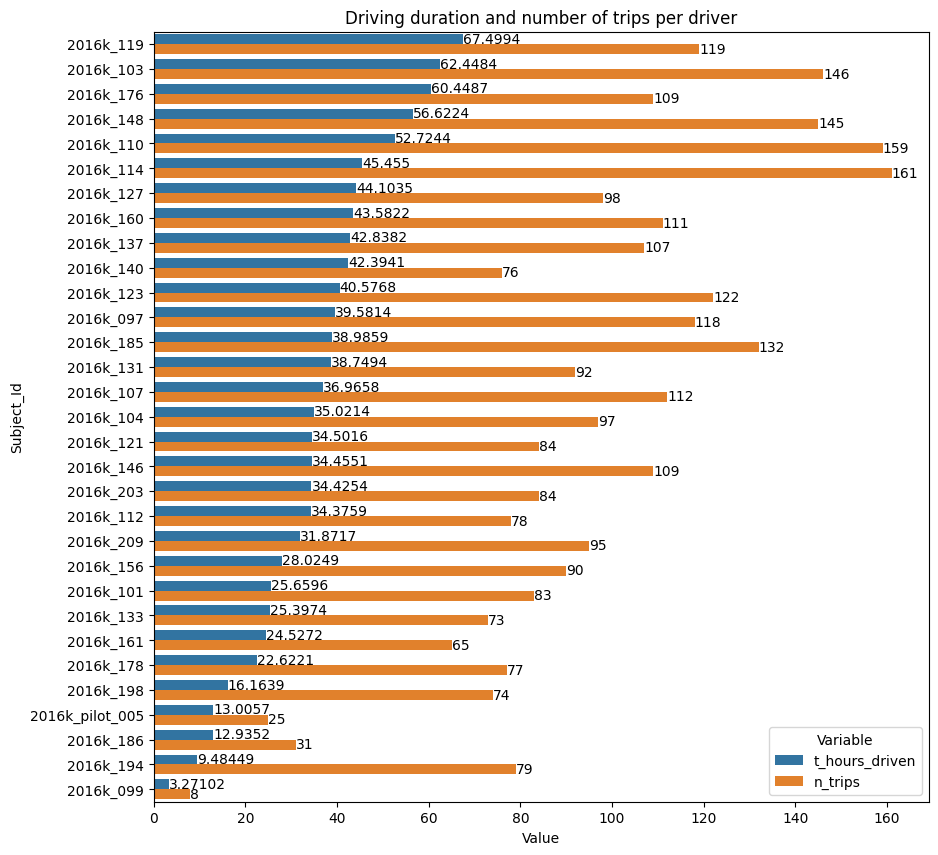

In [ ]:
# Display
fig, ax1 = plt.subplots(figsize=(10, 10))
ax = sns.barplot(unpivot_sorted_driver_to_n_trips_and_driven_hours_df, y="Subject_Id", x="Value", hue="Variable", ax=ax1)

## display values next to the bar
for i in ax.containers:
    ax.bar_label(i,)
title = "Driving duration and number of trips per driver"
plt.title(title) 
plt.show()
# Save diagram
title.replace(" ", "_").lower()
fig.savefig(img_path(title))

# Speed ups

## Number of speedups per driver

In [ ]:
# Number of speedups per drivers
rows = []
for driver, trips in driver_to_trip_to_speedups.items():
    if driver == None:
        continue
    for trip, speedups in trips.items():
        for speedup in speedups:
            rows.append(
                {
                    "driver": driver,
                    "speedup": f"{trip}-{speedup}"
                }
            )
n_speedups = len(rows)
driver_to_speedup_name_df = pd.DataFrame(rows)

Number of speedups: 34577


<Figure size 640x480 with 0 Axes>

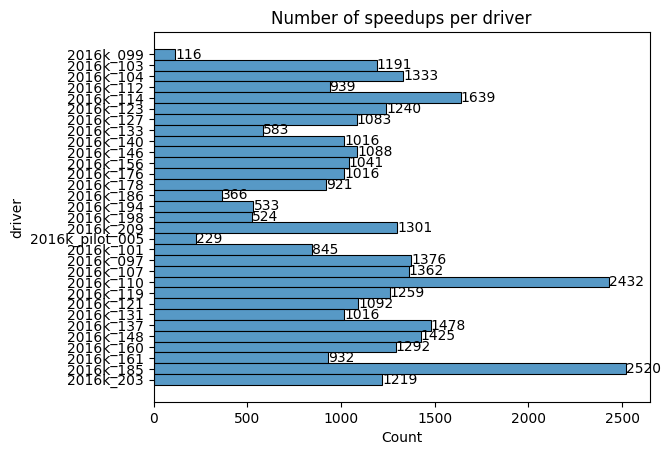

In [ ]:
from matplotlib.pyplot import figure
figure(0, figsize=(8, 6), dpi=80)
# Display 
print(f"Number of speedups: {n_speedups}")
fig = plt.figure()
ax = sns.histplot(driver_to_speedup_name_df, y="driver", bins=n_driver)
# display value next to the bar
for i in ax.containers:
    ax.bar_label(i,)
title = "Number of speedups per driver"
plt.title(title)
plt.show()
title.replace(" ", "_").lower()
fig.savefig(img_path(title))

## Compare number of speedups to driven hours

In [ ]:
speedup_parameters_and_properties_csv_path = str(os.path.join(root_path(), "_temp", "speedup_parameters_and_properties.csv"))
speedup_parameters_and_properties_csv_df: pd.DataFrame = pd.read_csv(speedup_parameters_and_properties_csv_path)

In [ ]:
# Sort by count of trips
sorted_driver_to_count_speedups_df = driver_to_speedup_name_df.groupby(["driver"])["speedup"].count().reset_index(
    name="n_speedups").sort_values(["n_speedups"], ascending=False)

sorted_driver_to_count_speedups_df.columns = ["subject_id", "n_speedups"]
sorted_driver_to_count_speedups_and_driven_hours_df = sorted_driver_to_count_speedups_df.merge(sorted_driver_to_durations_df_only_driven_hours, on="subject_id", how="inner")
unpivot_sorted_driver_to_count_speedups_and_driven_hours_df = sorted_driver_to_count_speedups_and_driven_hours_df.melt(id_vars='subject_id').rename(columns=str.title)

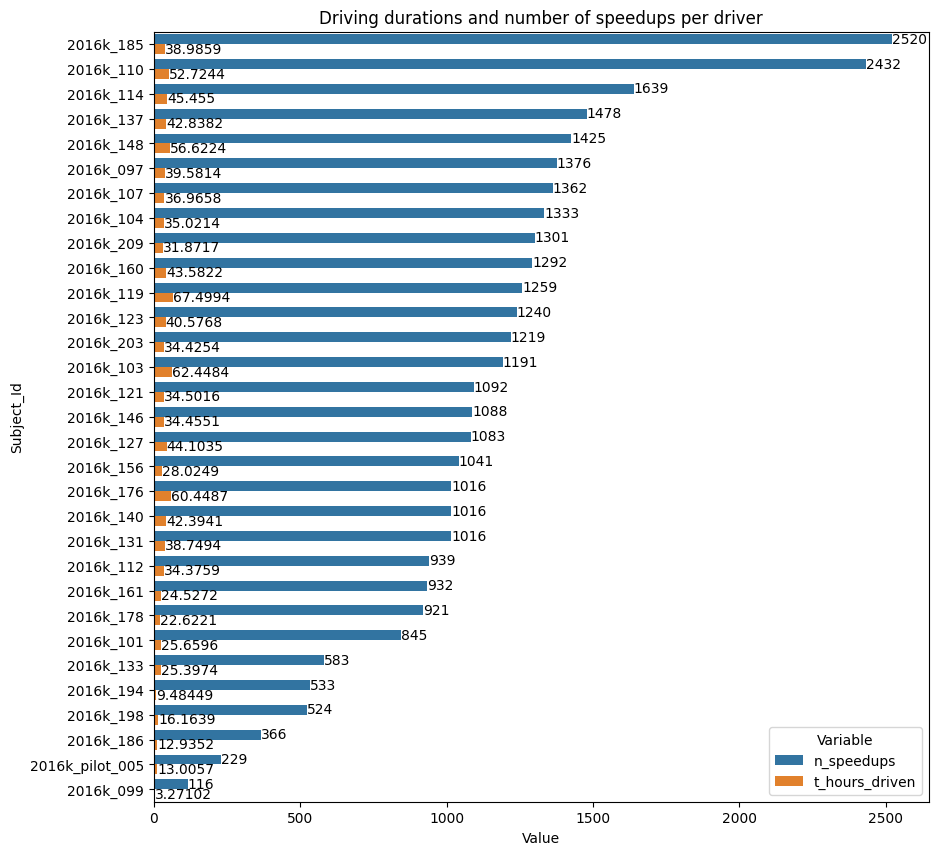

In [ ]:
# Display
fig, ax1 = plt.subplots(figsize=(10, 10))

ax = sns.barplot(unpivot_sorted_driver_to_count_speedups_and_driven_hours_df, y="Subject_Id", x="Value", hue="Variable", ax=ax1)

## display values next to the bar
for i in ax.containers:
    ax.bar_label(i,)
title = "Driving durations and number of speedups per driver"
plt.title(title) 
plt.show()
# Save diagram
title.replace(" ", "_").lower()
fig.savefig(img_path(title))

## Average durations of speedups per driver

In [ ]:
# Speed ups average durations per drivers
def trip_duration(df: pd.DataFrame) -> float:
    return df["ts_s_0"].iloc[-1] - df["ts_s_0"].iloc[0]
rows = []
for driver, trips in driver_to_trip_to_speedups.items():
    for trip, speedups in trips.items():
        for i_su, speedup in enumerate(speedups):
            rows.append(
                {
                    "driver": driver,
                    "speedup": f"{trip}-{i_su}",
                    "duration_in_s": trip_duration(speedup)
                }
            )
driver_to_speedup_duration_df = pd.DataFrame(rows)

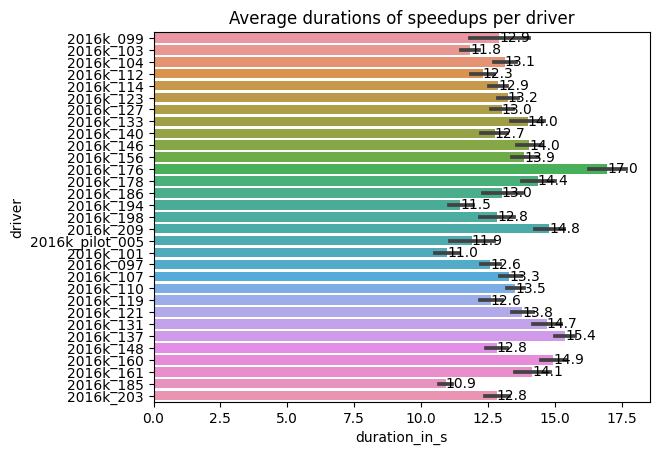

In [ ]:
# Display
fig = plt.figure()
ax = sns.barplot(data=driver_to_speedup_duration_df, y="driver", x="duration_in_s", orient="h")
## display value next to the bar
ax.bar_label(ax.containers[0], fmt='%.1f')
title = "Average durations of speedups per driver"
plt.title(title)
plt.show()
title.replace(" ", "_").lower()
fig.savefig(img_path(title))